<h1 style='color:white'>TP Integrador - CaC Big Data</h1>
<center><img src ='/work/img/portada.png'></center>

In [1]:
# A veces necesitamos instalar nuevas librerías en nuestros proyectos
!pip install openpyxl==3.0.10


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 6.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# imports
import numpy as np
import pandas as pd
import sqlite3 as sql3
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Paso 1: Alcances del proyecto y obtener datos</h2>
<h3>Alcances del proyecto</h3>
<p>En este proyecto vamos a integrar tres sets de datos con lista de vendedores, lista de artículos y registro de operaciones de un mes, que nos ayudarán a responder a las preguntas: </p>
<ul>
<li>¿Cuál es el artículo más vendido? (unidades)</li>
<li>¿Qué artículo es el que más ingresos nos proporcionó?</li>
<li>¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</li>
<li>¿Hay grandes variaciones en ventas a lo largo del mes?</li>
</ul>
<p>Para este proyecto utilizaremos herramientas de Pandas para análisis exploratorio, Numpy para el análisis de ciertas columnas y Matplotlib/Seaborn para visualización de resultados.</p>

<h3>Descripción y obtención de los datos</h3>
<h4>Fuentes de datos</h4>
<ul>
<li>articles.db: BD con datos de los artículos.</li>
<li>sellers.xlsx: datos de los vendedores.</li>
<li>orders.csv: registro de las ventas de un mes.</li>
</ul>

In [3]:
# Levanto los datos en 3 diferentes dataframes

# ARTÍCULOS
conn = sql3.connect('/work/data/articles.db') 
sql_query = pd.read_sql_query('SELECT * FROM articles', conn)
df_articles = pd.DataFrame(sql_query, columns=['article_id', 'article_name', 'unit_price'])

print(df_articles)



    article_id      article_name unit_price
0        20015        Smartphone     525.00
1        20016           Full Pc    2127.81
2        20017           Monitor     230.00
3        20018            Tablet     130.00
4        20019              Desk     130.10
5        20020             Chair     335.64
6        20021             Modem      67.50
7        20022    Range Extender      20.45
8        20023          Notebook    1000.00
9        20024           Netbook     145.00
10       20025               HDD      54.62
11       20026               SDD      22.00
12       20027        Ram Memory      35.95
13       20028       Motherboard     138.38
14       20029             Mouse      30.30
15       20030        Fan Cooler       4.25
16       20031            Webcam      20.07
17       20032          Keyboard      22.60
18       20033        Headphones      23.30
19       20034           Scanner     185.00
20       20035              Case      37.90
21       20036        Video Card

In [4]:
# VENDEDORES 
df_sellers = pd.read_excel('/work/data/sellers.xlsx', index_col=0)
print(df_sellers)

                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres
6           Milly Christoffe
7                 Kati Innot
8              Tobin Roselli
9               Onida Cosely
10           Cirilo Grandham
11           Vasily Danilyuk
12          Brockie Patience
13           Arnold Kilkenny
14            Janel O'Curran
15           Daisie Slograve


In [5]:
# ÓRDENES 
df_orders=pd.read_csv('/work/data/orders.csv')
print(df_orders)

     order_id  week  article_id  quantity  seller_id country_name
0       15024     1       20039        10         10         Peru
1       15025     1       20029        15          5         Peru
2       15026     1       20024         5         14      Bolivia
3       15027     1       20018         9         14       Brazil
4       15028     1       20035         6         15       Mexico
..        ...   ...         ...       ...        ...          ...
995     16019     4       20021         1          7       Brazil
996     16020     4       20040        15         15       Brazil
997     16021     4       20040         2         11     Colombia
998     16022     4       20018        14         11       Brazil
999     16023     4       20026        12          9       Brazil

[1000 rows x 6 columns]


<h2>Paso 2: Explorar y preparar los datos</h2>
<h3>Exploración</h3>

In [6]:
# Exploración del df de artículos
print('Muestra de los datos')
print(df_articles.head())
print('\nFormato del dataframe')
print(df_articles.shape)
print('\nBúsqueda de valores nulos')
print(df_articles.isnull().sum())
print('\nFormato de los datos por columna')
print(df_articles.dtypes)


Muestra de los datos
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Formato del dataframe
(31, 3)

Búsqueda de valores nulos
article_id      0
article_name    0
unit_price      0
dtype: int64

Formato de los datos por columna
article_id       int64
article_name    object
unit_price      object
dtype: object


In [7]:
# Exploración del df de vendedores
print('Muestra de los datos')
print(df_sellers.head())
print('\nFormato del dataframe')
print(df_sellers.shape)
print('\nBúsqueda de valores nulos')
print(df_sellers.isnull().sum())
print('\nFormato de los datos por columna')
print(df_sellers.dtypes)

Muestra de los datos
                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres

Formato del dataframe
(15, 1)

Búsqueda de valores nulos
seller_name    0
dtype: int64

Formato de los datos por columna
seller_name    object
dtype: object


In [8]:
# Exploración del df de órdenes
print('Muestra de los datos')
print(df_orders.head())
print('\nFormato del dataframe')
print(df_orders.shape)
print('\nBúsqueda de valores nulos')
print(df_orders.isnull().sum())
print('\nFormato de los datos por columna')
print(df_orders.dtypes)

Muestra de los datos
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Formato del dataframe
(1000, 6)

Búsqueda de valores nulos
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Formato de los datos por columna
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


<h3>Preparación</h3>
<p>Encuentro un inconveniente en la columna de precios de los artículos. Necesito cambiar el formato cadena a float.</p>

In [9]:
# cambio el tipo de dato de 'unit_price' a float
df_articles['unit_price'] = df_articles['unit_price'].astype(float)
print(df_articles.dtypes)

article_id        int64
article_name     object
unit_price      float64
dtype: object


In [10]:
# cambio el índice del df_articles por la columna article_id
df_articles.set_index('article_id', inplace=True)
print(df_articles.head())

           article_name  unit_price
article_id                         
20015        Smartphone      525.00
20016           Full Pc     2127.81
20017           Monitor      230.00
20018            Tablet      130.00
20019              Desk      130.10


<h2>Paso 3: Definir el modelo de datos</h2>
<p>Crearemos un nuevo dataframe a partir de las fuentes de datos proporcionados.</p>
<img src='/work/img/modelo.png'>


<h2>Paso 4: Correr los pipelines para modelar los datos</h2>
<p>Llamamos pipeline a una serie de procesos en el cual la salida de un proceso es la entrada que utiliza el siguiente proceso.</p>

In [11]:
# creo una copia del df_orders
my_df = df_orders.copy()

# agrego algunas columnas extra que necesito y las lleno con los códigos id que las vinculan con los otros df
my_df = my_df.assign(article_name = my_df['article_id'])
my_df = my_df.assign(total_amount = my_df['article_id'])
my_df = my_df.assign(seller_name = my_df['seller_id'])

print(my_df.head())


   order_id  week  article_id  quantity  seller_id country_name  article_name  \
0     15024     1       20039        10         10         Peru         20039   
1     15025     1       20029        15          5         Peru         20029   
2     15026     1       20024         5         14      Bolivia         20024   
3     15027     1       20018         9         14       Brazil         20018   
4     15028     1       20035         6         15       Mexico         20035   

   total_amount  seller_name  
0         20039           10  
1         20029            5  
2         20024           14  
3         20018           14  
4         20035           15  


In [12]:
# Reemplazo los valores en las nuevas columnas del df

for i in range(len(my_df.index)):
    article = df_articles.loc[my_df.loc[i]['article_name']]['article_name']
    my_df.loc[i,'article_name'] = article

    my_df.loc[i,'total_amount'] = my_df.loc[i,'quantity'] * df_articles.loc[my_df.loc[i]['total_amount']]['unit_price']

    my_df.loc[i,'seller_name'] = df_sellers.loc[my_df.loc[i]['seller_name']]['seller_name']    
    
    
print(my_df.head())

   order_id  week  article_id  quantity  seller_id country_name  \
0     15024     1       20039        10         10         Peru   
1     15025     1       20029        15          5         Peru   
2     15026     1       20024         5         14      Bolivia   
3     15027     1       20018         9         14       Brazil   
4     15028     1       20035         6         15       Mexico   

    article_name  total_amount      seller_name  
0  Water Cooling         675.0  Cirilo Grandham  
1          Mouse         454.5      Ewell Peres  
2        Netbook         725.0   Janel O'Curran  
3         Tablet        1170.0   Janel O'Curran  
4           Case         227.4  Daisie Slograve  


In [13]:
# Borrar las columnas que no voy a utilizar
my_df.drop(['order_id','article_id','seller_id'], axis='columns', inplace=True)

print(my_df.head())

   week  quantity country_name   article_name  total_amount      seller_name
0     1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1     1        15         Peru          Mouse         454.5      Ewell Peres
2     1         5      Bolivia        Netbook         725.0   Janel O'Curran
3     1         9       Brazil         Tablet        1170.0   Janel O'Curran
4     1         6       Mexico           Case         227.4  Daisie Slograve


<h2>Paso 5: Responder las preguntas</h2>


<h3>1. ¿Cuál es el artículo más vendido? (en unidades)</h3>

In [14]:
print(my_df.head())

   week  quantity country_name   article_name  total_amount      seller_name
0     1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1     1        15         Peru          Mouse         454.5      Ewell Peres
2     1         5      Bolivia        Netbook         725.0   Janel O'Curran
3     1         9       Brazil         Tablet        1170.0   Janel O'Curran
4     1         6       Mexico           Case         227.4  Daisie Slograve


In [15]:
# RESOLUCIÓN ANALÍTICA
df2 = my_df.groupby('article_name').sum()
por_cant = df2.sort_values('quantity', ascending=False)
print(por_cant['quantity'].head(1))
print(df2.head())

article_name
HDD    413
Name: quantity, dtype: int64
              week  quantity  total_amount
article_name                              
CPU             66       266      37138.92
Case            54       206       7807.40
Chair           56       207      69477.48
Desk            60       223      29012.30
Fan Cooler      64       205        871.25


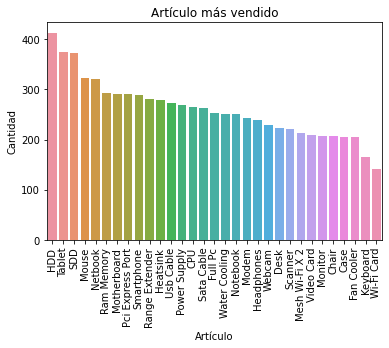

In [16]:
# RESOLUCIÓN GRÁFICA
sns.barplot(x=df2.index,y=df2['quantity'],data=df2, saturation=.8, order=df2.sort_values('quantity', ascending=False).index).set_title("Artículo más vendido")
sns.set( rc = {'figure.figsize' :(20, 10),  'axes.labelsize': 12 },style='whitegrid',font_scale =1.9) 
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad')
plt.show()


El artículo más vendido en cantidades, es el HDD, seguido por Tablet y SDD

<h3>2. ¿Qué artículo es el que más ingresos nos proporcionó?</h3>

In [17]:
# RESOLUCIÓN ANALÍTICA
df3=(my_df.groupby('article_name').sum()).sort_values('total_amount', ascending=False).head(5)
print(df3['total_amount'])

article_name
Full Pc       538335.93
Notebook      251000.00
Smartphone    152250.00
Chair          69477.48
Tablet         48620.00
Name: total_amount, dtype: float64


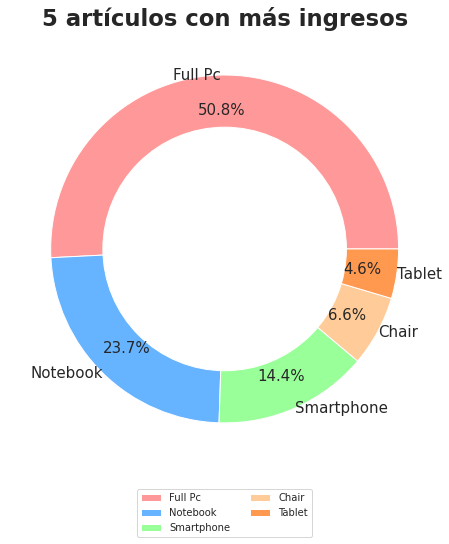

In [18]:
# RESOLUCIÓN GRÁFICA 
fig = plt.figure()
fig.set_figheight(8)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9950']
textprops = {"fontsize":15}
plt.pie(x=df3['total_amount'],labels=df3.index,textprops =textprops, colors=colors, autopct='%.1f%%',pctdistance=0.8, labeldistance=1)
plt.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.title('5 artículos con más ingresos',fontweight='bold')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

El artículo con mayores ingresos generados es Full PC, seguido de Notebook y Smartphone.  Vemos que este top 3 no guarda relación con los artículos más vendidos en cantidades, debido a que influye el precio unitario de cada artículo.

<h3>3. ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>

In [19]:
# RESOLUCIÓN ANALÍTICA
df4 =(my_df.groupby('seller_name').sum()).sort_values('total_amount', ascending=False)
print('Respuesta:', df4.head(1) )
print()
print(df4[['quantity']+['total_amount']])


Respuesta:                 week  quantity  total_amount
seller_name                                 
Janel O'Curran   174       703     192832.47

                   quantity  total_amount
seller_name                              
Janel O'Curran          703     192832.47
Brockie Patience        441     142709.88
Oliviero Charkham       555     141329.76
Vasily Danilyuk         521     129157.55
Daisie Slograve         554     120520.11
Aveline Swanwick        629     118874.33
Arnold Kilkenny         583      94552.04
Kati Innot              512      83704.62
Jase Doy                582      80628.31
Ewell Peres             496      78144.32
Onida Cosely            535      77373.37
Milly Christoffe        442      61733.69
Tobin Roselli           519      56984.42
Cornie Wynrehame        523      52253.57
Cirilo Grandham         470      45009.40


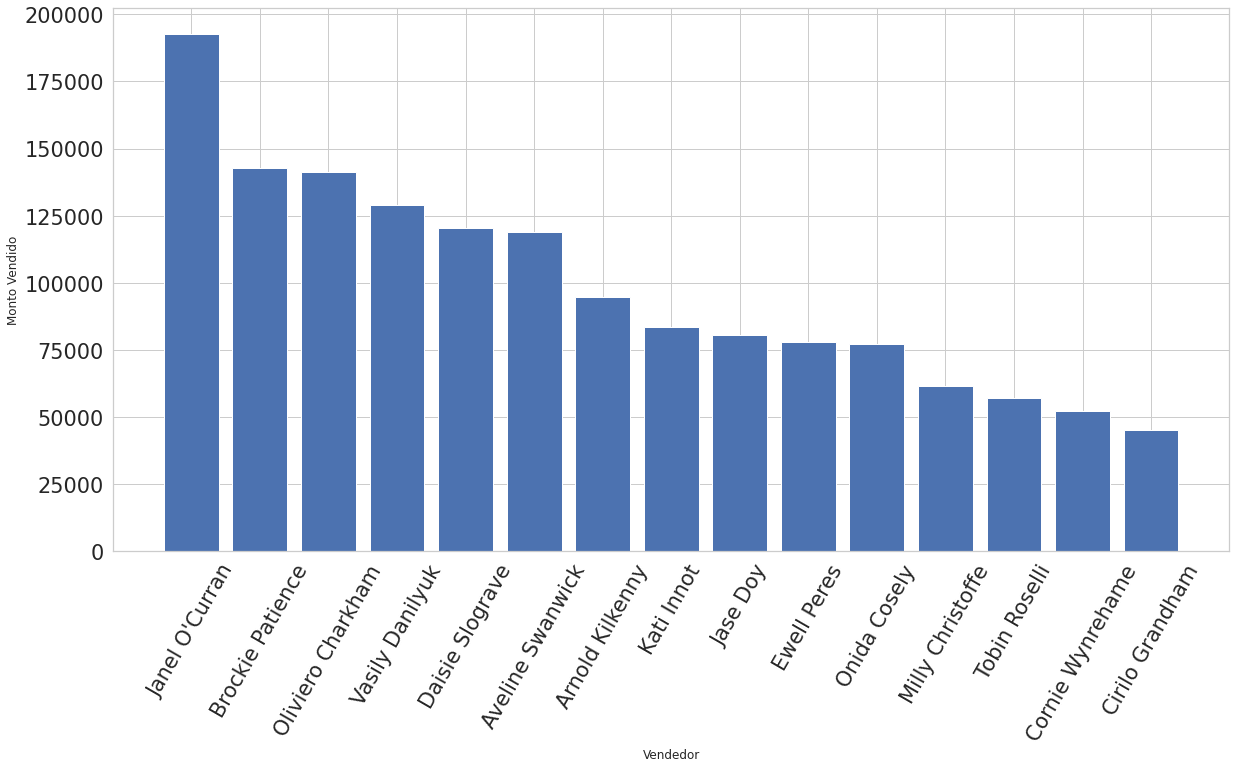

In [20]:
# RESOLUCIÓN GRÁFICA
plt.bar(df4.index, df4['total_amount'])
plt.xlabel('Vendedor')
plt.ylabel('Monto Vendido')
plt.xticks(rotation=60)
plt.show()

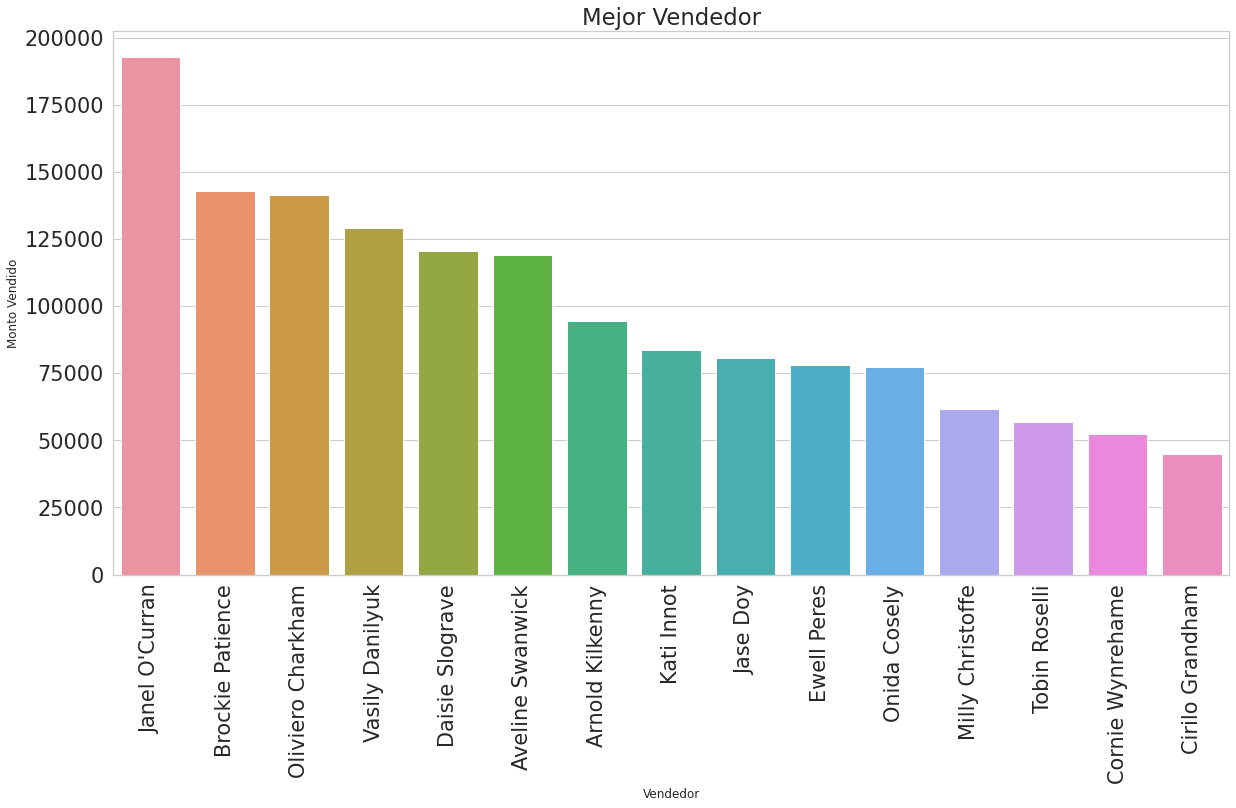

In [21]:
# RESOLUCIÓN GRÁFICA2
sns.barplot(x=df4.index,y=df4['total_amount'],data=df4, saturation=.8, order=df4.sort_values('total_amount', ascending=False).index).set_title("Mejor Vendedor")
sns.set( rc = {'figure.figsize' :(20, 10),  'axes.labelsize': 12 },style='whitegrid',font_scale =1.9) 
plt.xticks(rotation=90)
plt.xlabel('Vendedor')
plt.ylabel('Monto Vendido')
plt.show()

El vendedor que genera mayores ingresos y que además también vende la mayor cantidad de artículos es Janel O'Curran. 

Veamos la forma en que cada vendedor distribuye sus ventas.

In [22]:
cross3=pd.crosstab(my_df.seller_name, my_df.article_name, my_df.total_amount, aggfunc=np.sum)
cross3.head()

article_name          CPU    Case    Chair    Desk  Fan Cooler   Full Pc  \
seller_name                                                                
Arnold Kilkenny   7679.10  1137.0  8391.00  2602.0       76.50  17022.48   
Aveline Swanwick      NaN  1174.9  3692.04  4553.5       80.75  44684.01   
Brockie Patience  1675.44   151.6  6712.80     NaN         NaN  97879.26   
Cirilo Grandham   3071.64   151.6  6041.52     NaN       85.00   2127.81   
Cornie Wynrehame  2233.92     NaN   671.28   780.6       89.25       NaN   

article_name          HDD  Headphones  Heatsink  Keyboard  ...     SDD  \
seller_name                                                ...           
Arnold Kilkenny   1583.98       279.6     290.0       NaN  ...   462.0   
Aveline Swanwick  1583.98       675.7       NaN     813.6  ...   308.0   
Brockie Patience   819.30       559.2     300.0     655.4  ...   264.0   
Cirilo Grandham    710.06        69.9     120.0     339.0  ...   770.0   
Cornie Wynrehame  2348.66       116.5     370.0       NaN  ...  1012.0   

article_name      Sata Cable  Scanner  Smartphone  Tablet  Usb Cable  \
seller_name                                                            
Arnold Kilkenny          NaN   4995.0      3150.0  5070.0       2.95   
Aveline Swanwick       36.38   3145.0      4200.0   520.0        NaN   
Brockie Patience       12.84   1295.0     11025.0  6500.0       5.90   
Cirilo Grandham        25.68   1480.0     13650.0  4290.0     118.00   
Cornie Wynrehame       36.38   1295.0      2625.0  2860.0     120.95   

article_name      Video Card  Water Cooling  Webcam  Wi-Fi Card  
seller_name                                                      
Arnold Kilkenny       2630.0          472.5     NaN         NaN  
Aveline Swanwick      1972.5          675.0   80.28      953.76  
Brockie Patience      1052.0          607.5  541.89         NaN  
Cirilo Grandham        920.5         1687.5  301.05      119.22  
Cornie Wynrehame      1709.5         1417.5  401.40      476.88  

[5 rows x 31 columns]

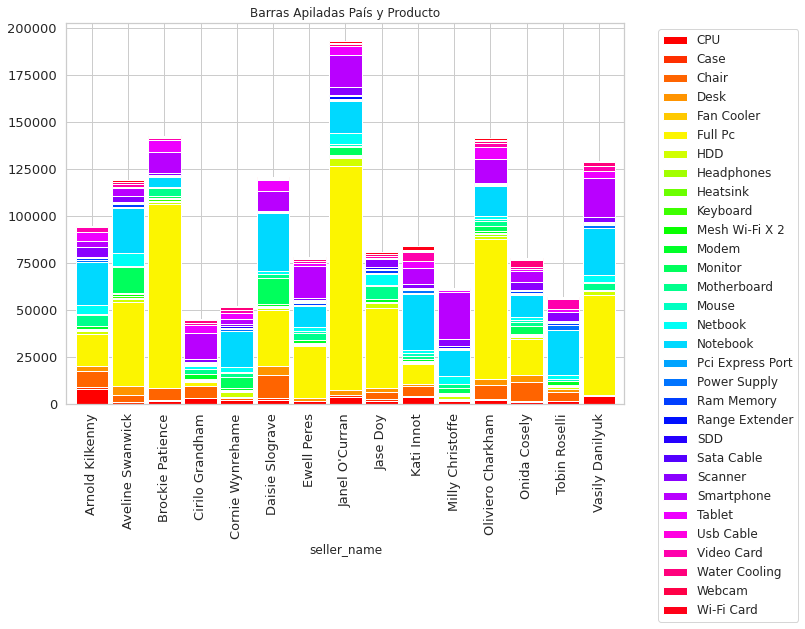

In [41]:
cross3.plot(kind = 'bar', 
            stacked = True, 
            title = 'Barras Apiladas País y Producto', 
            mark_right = True,
            cmap='hsv',
            fontsize=13, 
            figsize= (10,7),
            width=0.9,
            style='whitegrid').set_facecolor('w')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.rc('legend', fontsize=10)

Janel O'Curran es el vendedor con mayores ventas, y en parte esto viene impulsado porque se concentra en vender los productos que están en el top3 de ingresos, es decir, Full Pc, Notebook y SmartPhones. Hay otros vendedores, como Tobin Roselli, cuya cartera de ventas, no se orienta a los productos más vendidos; quizás pudiera intentar cambiar su mix de productos, y ofrecer a los clientes los productos que generan más ingresos para la empresa.

<h3>4. ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<h4>Si es así, ¿en qué momento debería lanzar una campaña de promociones?</h4>


In [24]:
# RESOLUCIÓN ANALÍTICA
df5 = (my_df.groupby('week').sum()).sort_values('total_amount',ascending=False)
print(df5)

      quantity  total_amount
week                        
1         2449     507458.81
2         2444     415364.44
3         2114     329140.03
4         1058     223844.56


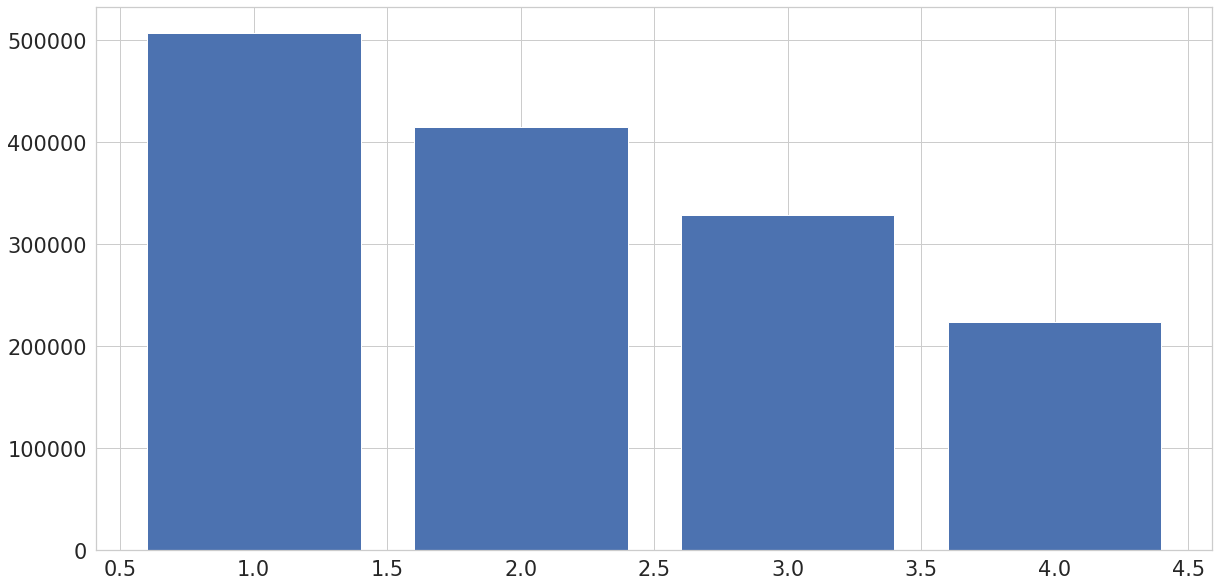

In [25]:
# RESOLUCIÓN GRÁFICA
plt.bar(df5.index, df5['total_amount'])
plt.show()

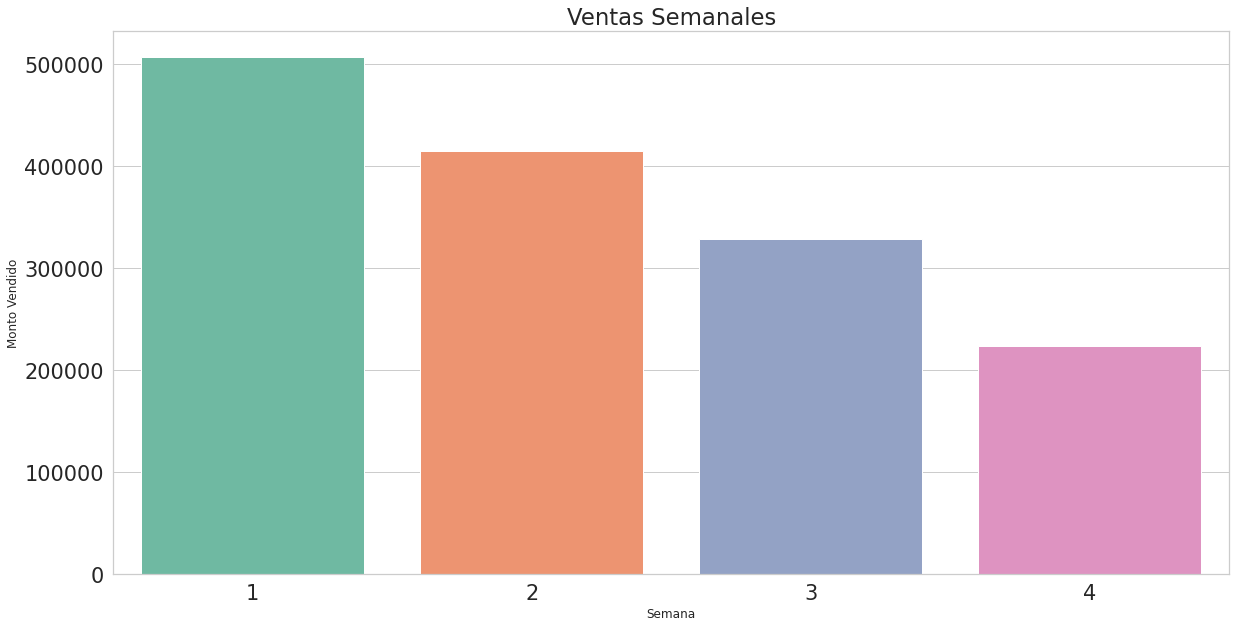

In [26]:
# RESOLUCIÓN GRÁFICA 2
sns.barplot(x=df5.index,y=df5['total_amount'],data=df5, palette="Set2",saturation=.8, order=df5.sort_values('total_amount', ascending=False).index).set_title("Ventas Semanales")
sns.set( rc = {'figure.figsize' :(20, 10),  'axes.labelsize': 12 },style='whitegrid',font_scale =1.9) 
plt.xticks(rotation=0)
plt.xlabel('Semana')
plt.ylabel('Monto Vendido')
plt.show()

Las personas realizan sus compras principalmente en la semana 1 del mes, y luego van disminuyendo paulatinamente, siendo la cuarta y última semana, la que presenta menores ventas.

<h2>Tareas a realizar</h2>
<ul>
<li>Pensar 3 preguntas y responderlas con el método que consideres más apropiado. Al menos una de ellas debe contener la columna 'country_name' y al menos una de ellas debe buscar correlación entre dos variables categóricas.</li>
<li>Personalizar, estilar y dar contexto a las gráficas.</li>
<li>Generar un informe en el que se responda en forma coloquial a las preguntas, agregando conclusiones y consejos que puedan surgir de este trabajo. Se pueden agregar imágenes.</li>
<li>Publicar el trabajo y concretar la entrega en <a href="https://docs.google.com/forms/d/e/1FAIpQLSdiu_l6aO4tKBLiojZJp-RLF--deRAW0VM-0eqQ9tHJSD-j7A/viewform">https://docs.google.com/forms/d/e/1FAIpQLSdiu_l6aO4tKBLiojZJp-RLF--deRAW0VM-0eqQ9tHJSD-j7A/viewform</a>. <br>Deberás proporcionar link al notebook fuente y a la publicación. <br>Video/guía de cómo entregar el trabajo: <a href="https://youtu.be/FCQRhs4dxls">https://youtu.be/FCQRhs4dxls</a></li>
<li>Entregas:  4 de julio hasta 15 de julio, 2022 - 23:59 hs</li>
</ul>

<h3>5. ¿Cuál es el país con mayor venta (total_amount?</h3>

In [27]:
# RESOLUCIÓN ANALÍTICA
df6 = (my_df.groupby('country_name').sum()).sort_values('total_amount',ascending=False)
print('Respuesta:', df6.head(1))
print()
print(df6[['quantity']+['total_amount']].head())

Respuesta:               week  quantity  total_amount
country_name                              
Brazil         717      2515     441271.85

              quantity  total_amount
country_name                        
Brazil            2515     441271.85
Argentina          947     205832.78
Colombia           881     177514.29
Peru              1027     161421.12
Mexico             846     138619.99


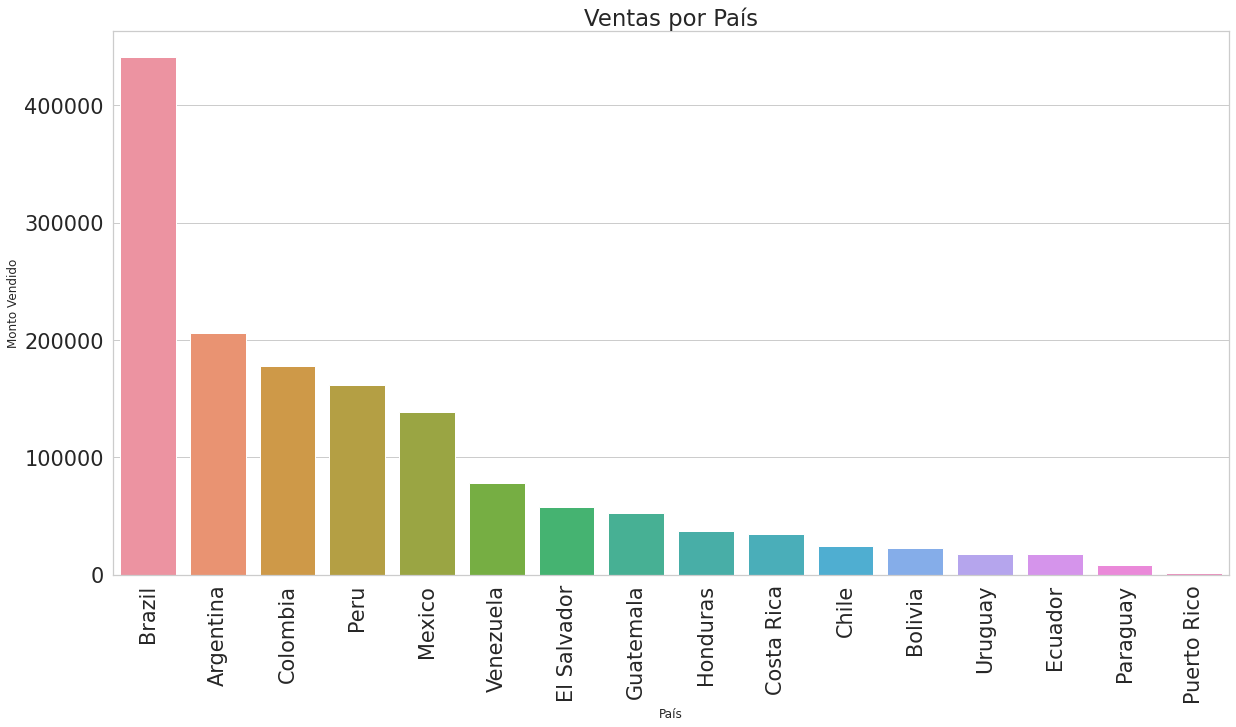

In [28]:
#RESOLUCIÓN GRÁFICA
sns.barplot(x=df6.index,y=df6['total_amount'],data=df6, saturation=.8, order=df6.sort_values('total_amount', ascending=False).index).set_title("Ventas por País")
sns.set( rc = {'figure.figsize' :(12, 10),  'axes.labelsize': 12 },style='whitegrid',font_scale =1) 
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Monto Vendido')
plt.show()

El país con mayor venta es Brazil, tanto a nivel de ventas en valor monetario, como en cantidades vendidas.

<h3>6. ¿Las variables quantity y total_amount guardan alguna relación?</h3>

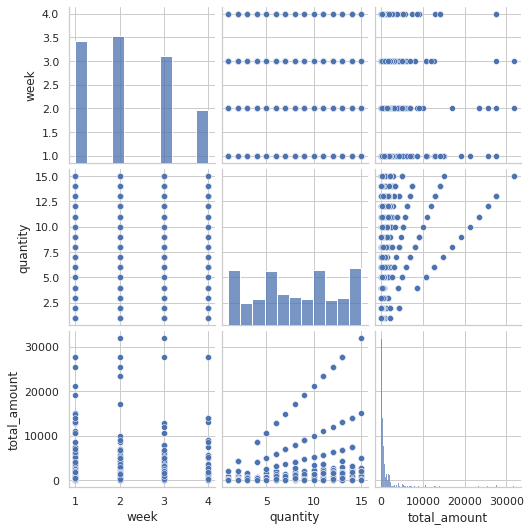

In [29]:
# RESOLUCIÓN

# Para encontrar relación hacemos un pairplot
# Las variables que pudieran relacionarse son:week, quantity y total_amount
sns.pairplot(my_df)
# En el gráfico se puede ver que hay una relación entre quantity y total_amount


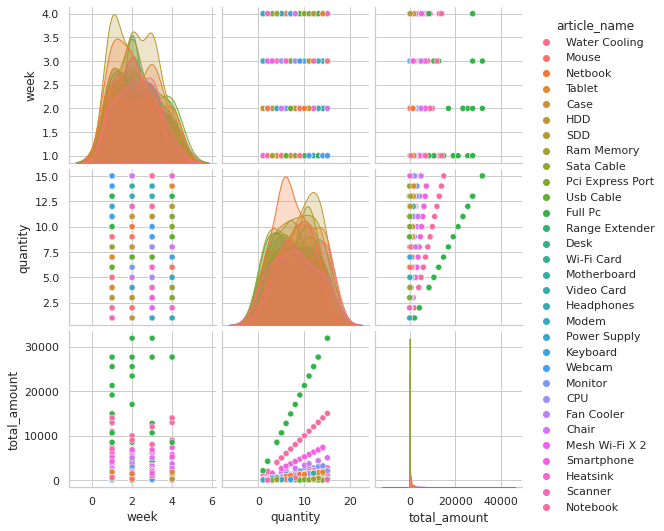

In [30]:
# Para encontrar mejor relación, distinguimos por article_name
# Esto es lógico porque total_amount se obtuvo el cálculo de quantity*unit_price
# La relación entre quantity y total_amount se da en diferente proporción para cada artículo

sns.pairplot(my_df, hue='article_name')
plt.rc('legend', fontsize=12)
plt.show()

Hay relación entre las variables cantidad y total_amount, las cuales tienen una correlación positiva, es decir, al aumentar la cantidad vendida, también aumenta el monto total (total_amount).  Esto es evidente que ocurriera, debido a que la variable total_amount la construimos partiendo de la multiplicación de cantidad*precio_unitario. Adicionalmente, esa relación se puede distinguir por producto, esto porque cada producto tiene su precio.

<h3>7. ¿En qué productos se basa Brasil para ser el país con el mayor ingreso en este análisis? </h3>

In [31]:
# RESOLUCIÓN ANALÍTICA
#Creamos una tabla cruzada para ver los productos vendidos en cada país
cross2=pd.crosstab(my_df.country_name, my_df.article_name, my_df.total_amount, aggfunc=np.sum)
print(cross2.head())

article_name       CPU    Case     Chair     Desk  Fan Cooler    Full Pc  \
country_name                                                               
Argentina     14520.48   758.0   2013.84   1170.9      199.75   95751.45   
Bolivia            NaN     NaN       NaN   2081.6         NaN   10639.05   
Brazil        11448.84  2690.9  37591.68  12619.7      246.50  134052.03   
Chile              NaN     NaN   4363.32   1040.8         NaN    2127.81   
Colombia       2373.54   644.3   8391.00   3772.9       29.75   72345.54   

article_name      HDD  Headphones  Heatsink  Keyboard  ...     SDD  \
country_name                                           ...           
Argentina     3714.16       442.7       NaN     700.6  ...  1606.0   
Bolivia           NaN         NaN       NaN     293.8  ...     NaN   
Brazil        6499.78      1700.9    1030.0     836.2  ...  2574.0   
Chile         1147.02         NaN     120.0      67.8  ...     NaN   
Colombia      1857.08      1281.5     260.0    

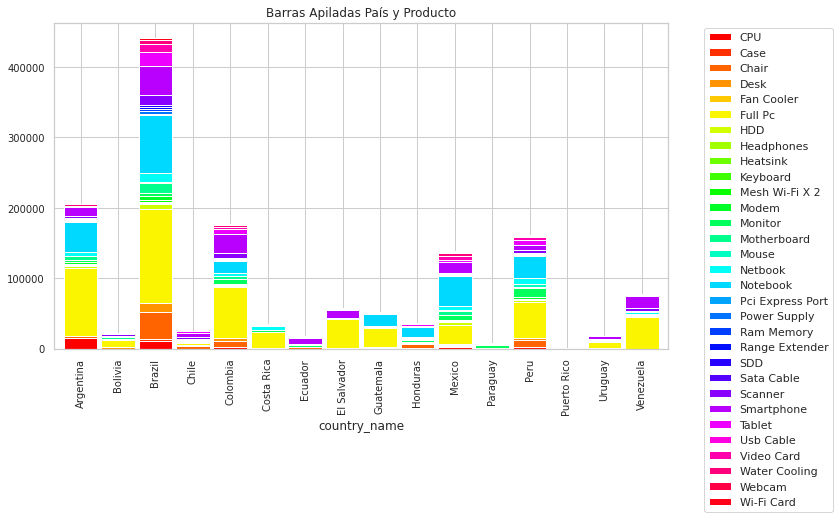

In [32]:
# RESOLUCIÓN GRÁFICA
cross2.plot(kind = 'bar', 
            stacked = True, 
            title = 'Barras Apiladas País y Producto', 
            mark_right = True,
            cmap='hsv',
            fontsize=10, 
            width=0.9,
            figsize= (11,6),
            style='whitegrid').set_facecolor('w')
sns.set( rc = {'figure.figsize' :(10, 10),  'axes.labelsize': 12 },style='whitegrid',font_scale =1) 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.rc('legend', fontsize=12)

Brasil es el país con más ventas, pero adicionalmente al ver a detalle los productos que vende para entender el éxito que ha logrado, vemos que sus ventas se concentran en los mismos productos que vimos anteriormente con mayores ventas: Full Pc, Notebook y SmartPhone; es decir, se enfocan en los productos que generan más ingresos.

### 8. Análisis del Total_amount

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


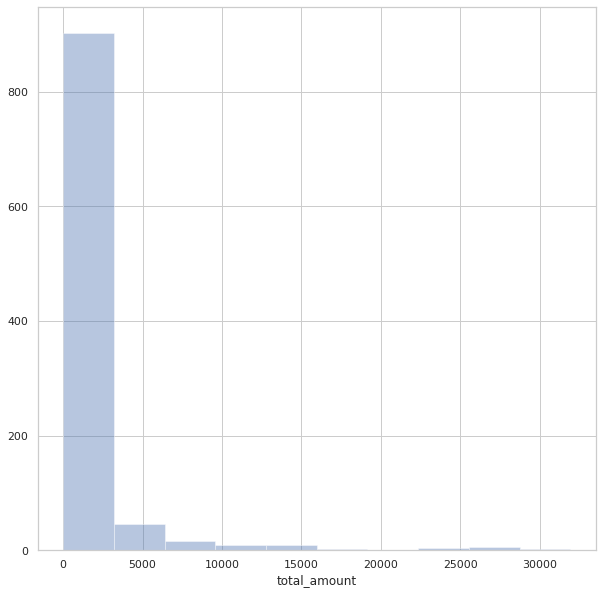

In [33]:
sns.distplot(my_df.total_amount,kde=False, bins=10)
plt.show()

El total_amount se concentra en productos con ingresos entre 0-5000, mientras que en mucha menor proporción se encuentra en un total_amount mayor a 5000.

### 9. Full_Pc

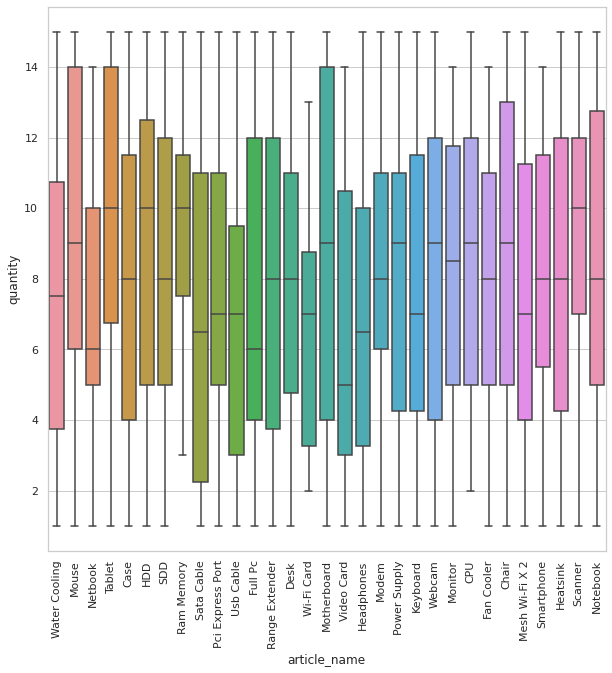

In [38]:
sns.boxplot(x='article_name', y='quantity', data=my_df)
plt.xticks(rotation=90)
plt.show()

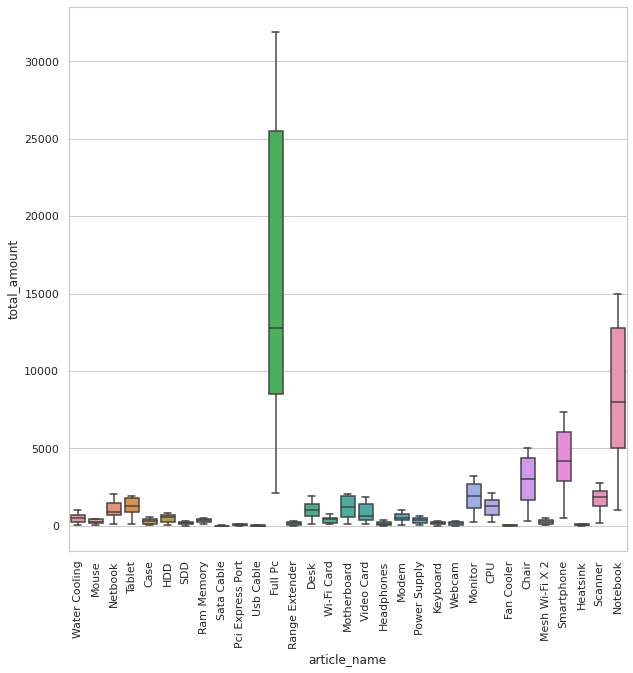

In [34]:
sns.boxplot(x='article_name', y='total_amount', data=my_df)
plt.xticks(rotation=90)
plt.show()

Cuando hacemos el boxplot del producto por quantity y total_amount, vemos que  el artículo "Full Pc" (el que genera mayores ingresos) para quantity tiene una mediana baja respecto al resto de artículos, mientras que para total_amount, la mediana es de aproximadamente 13.000$, siendo el producto con mayor valor, aportando así mayores ingresos.  Es decir, vendiendo pocas cantidades, se tienen mayores ingresos.

<h2>Conclusiones y propuestas</h2>

En esta empresa hay distintos tipos de productos, y cada uno de ellos tiene una venta en cantidad y en monto. Hay productos que tienen una alta rotación en sus ventas, pero el monto es bajo; mientras que hay otros productos que tienen montos más elevados, lo cual genera mayores ingresos. (En este caso, haría falta sumar al análisis la tabla de costos, para conocer realmente el ingreso neto por productos, y conocer la estrategia a seguir).

El top3 de productos más vendidos en cantidad son:
- HDD
- Tablet
- SDD

Sin embargo, si hacemos el top3 pero con los artículos con mayores ingresos, el ranking es el siguiente:
- Full Pc
- Notebook
- SmartPhone

Como vemos estos top3 son muy diferentes, no hay coincidencia entre los productos; ya que aunque HDD, Tablet y SDD se venden con mayor frecuencia, su precio unitario es bajo y genera bajos ingresos a la empresa.

El país con mayor ventas es Brasil, y esto lo logra debido a que sigue una estrategia en donde vende mayor cantidad de productos, pero adicionalmente se concentra en los 3 productos que generan mayores ingresos, es decir, Full Pc, Notebook y SmartPhone.  Si vendieran la misma cantidad, pero de productos con bajos ingresos, pudiera ocurrir que no sea el n° 1 en ingresos.

Al buscar relación entre las variables evaluadas en este análisis, vemos que hay una correlación positiva entre quantity y total_amount, y esto ocurre debido a que total_amount fue un dato que obtuvimos de nuestro dataset original, cuando multiplicamos "quantity*unit_price".  Y dicha relación se puede ver reflejada graficamente, en donde para cada producto esa relación es única.

La propuesta sería, incluir una tabla con los costos de cada producto, para obtener en ingreso neto, y conocer qué productos son los que generan mayor rentabilidad a la empresa.

Otra propuesta sería evaluar las ventas logradas por el mejor vendedor (Janel O'Curran) para poder determinar si ese modelo sería aplicable a otros vendedores en diferentes paises, y así lograr mayores ingresos a nivel global. Claro, allí se deben evaluar otros factores, como los niveles de inventarios de cada país, la oferta y demanda, satisfacción de los empleados, etc.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c04b03e7-afb4-45d4-99ac-cc965e6430ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>